#### Predecting Strikeouts

using xgboost modeling to predict strikeout rate

In [40]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import root_mean_squared_error
import os
import numpy as np

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/Coding Projects/Hitting Analysis/data/')

data grabbed and pre cleaned from local sql server

In [41]:
strikeout = pd.read_csv('./full/strikeout.csv')
strikeout['next_k'] = strikeout.groupby('name')['k_pct'].shift(-1)
strikeout_train = strikeout[strikeout['season'] != 2023]
strikeout_train = strikeout_train[strikeout_train['next_k'].notna()]

#### xgboost

In [42]:
X = strikeout_train.drop(columns=['name', 'season', 'k_pct', 'pa', 'z_contact_pct', 'next_k'])
y = strikeout_train['k_pct']

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, shuffle=True, random_state=26)

In [44]:
model = xgb.XGBRegressor()
model = model.fit(xtrain, ytrain)

In [208]:
rnd_search_params = {
    'learning_rate': np.linspace(0.05, 0.2, 4),          
    'max_leaves': np.linspace(1, 40, 20, dtype=int),     
    'min_child_weight': np.linspace(1, 20, 10),         
    'subsample': np.linspace(0.3, 0.9, 7),               
    'colsample_bytree': np.linspace(0.4, 1, 7),          
    'early_stopping_rounds': np.linspace(10, 100, 10, dtype=int),  
    'max_depth': np.linspace(0, 40, 20, dtype=int)       
}

rnd_searcher = RandomizedSearchCV(model, rnd_search_params, random_state=26, n_iter=500, cv=4, n_jobs=-1, verbose=0)
rnd_searcher.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])
print(rnd_searcher.best_params_)

[0]	validation_0-rmse:0.08600
[1]	validation_0-rmse:0.08320
[2]	validation_0-rmse:0.08042
[3]	validation_0-rmse:0.07794
[4]	validation_0-rmse:0.07550
[5]	validation_0-rmse:0.07336
[6]	validation_0-rmse:0.07132
[7]	validation_0-rmse:0.06940
[8]	validation_0-rmse:0.06762
[9]	validation_0-rmse:0.06592
[10]	validation_0-rmse:0.06433
[11]	validation_0-rmse:0.06289
[12]	validation_0-rmse:0.06155
[13]	validation_0-rmse:0.06040
[14]	validation_0-rmse:0.05920
[15]	validation_0-rmse:0.05807
[16]	validation_0-rmse:0.05710
[17]	validation_0-rmse:0.05608
[18]	validation_0-rmse:0.05521
[19]	validation_0-rmse:0.05431
[20]	validation_0-rmse:0.05347
[21]	validation_0-rmse:0.05269
[22]	validation_0-rmse:0.05200
[23]	validation_0-rmse:0.05140
[24]	validation_0-rmse:0.05083
[25]	validation_0-rmse:0.05027
[26]	validation_0-rmse:0.04962
[27]	validation_0-rmse:0.04923
[28]	validation_0-rmse:0.04885
[29]	validation_0-rmse:0.04846
[30]	validation_0-rmse:0.04814
[31]	validation_0-rmse:0.04779
[32]	validation_0-

In [6]:
grid_search_params = {
    'learning_rate': [0.05, 0.1],   
    'max_leaves': [8, 9, 10],
    'min_child_weight': [11, 12, 13],      
    'subsample': [0.4, 0.5, 0.6],           
    'colsample_bytree':[0.8, 0.9, 1],     
    'early_stopping_rounds':[30, 40, 50],
    'max_depth': [8,10, 12]
}

In [27]:
opti = {'colsample_bytree': 1, 'early_stopping_rounds': 30, 'learning_rate': 0.05, 'max_depth': 8, 'max_leaves': 9, 'min_child_weight': 11, 'subsample': 0.5}

In [7]:
grid_searcher = GridSearchCV(model, grid_search_params, cv=2, n_jobs=-1, verbose=4)
grid_searcher.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])
print(grid_searcher.best_params_)

Fitting 2 folds for each of 1458 candidates, totalling 2916 fits
[0]	validation_0-rmse:0.08597
[1]	validation_0-rmse:0.08322
[2]	validation_0-rmse:0.08047
[3]	validation_0-rmse:0.07801
[4]	validation_0-rmse:0.07560
[5]	validation_0-rmse:0.07351
[6]	validation_0-rmse:0.07149
[7]	validation_0-rmse:0.06962
[8]	validation_0-rmse:0.06786
[9]	validation_0-rmse:0.06616
[10]	validation_0-rmse:0.06466
[11]	validation_0-rmse:0.06328
[12]	validation_0-rmse:0.06194
[13]	validation_0-rmse:0.06081
[14]	validation_0-rmse:0.05964
[15]	validation_0-rmse:0.05853
[16]	validation_0-rmse:0.05759
[17]	validation_0-rmse:0.05660
[18]	validation_0-rmse:0.05574
[19]	validation_0-rmse:0.05490
[20]	validation_0-rmse:0.05407
[21]	validation_0-rmse:0.05331
[22]	validation_0-rmse:0.05262
[23]	validation_0-rmse:0.05203
[24]	validation_0-rmse:0.05147
[25]	validation_0-rmse:0.05097
[26]	validation_0-rmse:0.05033
[27]	validation_0-rmse:0.04983
[28]	validation_0-rmse:0.04941
[29]	validation_0-rmse:0.04904
[30]	validation

In [45]:
model = model.set_params(**opti)
model = model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[0]	validation_0-rmse:0.07955
[1]	validation_0-rmse:0.07728
[2]	validation_0-rmse:0.07514
[3]	validation_0-rmse:0.07315
[4]	validation_0-rmse:0.07123
[5]	validation_0-rmse:0.06950
[6]	validation_0-rmse:0.06786
[7]	validation_0-rmse:0.06630
[8]	validation_0-rmse:0.06487
[9]	validation_0-rmse:0.06353
[10]	validation_0-rmse:0.06221
[11]	validation_0-rmse:0.06096
[12]	validation_0-rmse:0.05980
[13]	validation_0-rmse:0.05870
[14]	validation_0-rmse:0.05766
[15]	validation_0-rmse:0.05668
[16]	validation_0-rmse:0.05574
[17]	validation_0-rmse:0.05488
[18]	validation_0-rmse:0.05407
[19]	validation_0-rmse:0.05328
[20]	validation_0-rmse:0.05260
[21]	validation_0-rmse:0.05189
[22]	validation_0-rmse:0.05130
[23]	validation_0-rmse:0.05077
[24]	validation_0-rmse:0.05032
[25]	validation_0-rmse:0.04988
[26]	validation_0-rmse:0.04946
[27]	validation_0-rmse:0.04893
[28]	validation_0-rmse:0.04854
[29]	validation_0-rmse:0.04821
[30]	validation_0-rmse:0.04784
[31]	validation_0-rmse:0.04756
[32]	validation_0-

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

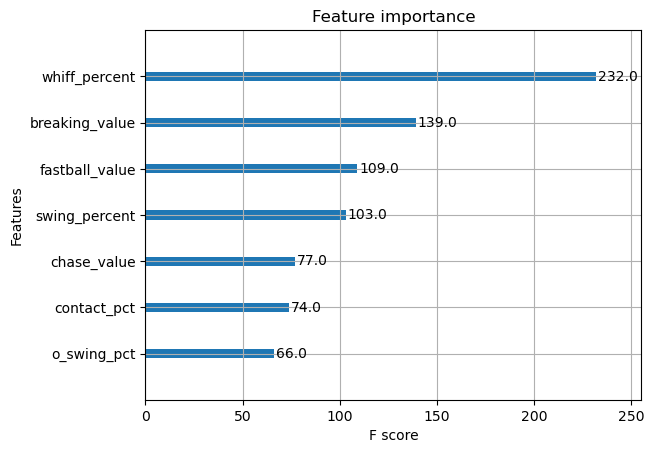

In [46]:
xgb.plot_importance(model)

In [47]:
predicted = model.predict(xtest)

#### Results

In [48]:
r = np.corrcoef(predicted, ytest.reset_index(drop=True))[0, 1]
print(r)

rmse = root_mean_squared_error(y_true=ytest, y_pred=predicted)
print(rmse)

0.877817305767293
0.040476020092189674


In [50]:
strikeout23 = strikeout[strikeout['season'] == 2023]
x_24 = strikeout23.drop(columns=['name', 'season', 'k_pct', 'pa', 'z_contact_pct', 'next_k'])
strikeout23['pred_k'] = model.predict(x_24)
strikeout23 = strikeout23[['name','pa', 'season','k_pct', 'pred_k']]
strikeout23['diff'] = strikeout23['k_pct'] - strikeout23['pred_k']

C:\Users\dalto\AppData\Local\Temp\ipykernel_27600\759014072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strikeout23['pred_k'] = model.predict(x_24)


In [51]:
strikeout24 = strikeout[strikeout['season'] == 2024]
x_25 = strikeout24.drop(columns=['name', 'season', 'k_pct', 'pa', 'z_contact_pct', 'next_k'])
strikeout24['pred_k_24'] = model.predict(x_25)
strikeout24 = strikeout24[['name','pa', 'k_pct', 'pred_k_24']]
strikeout_23_24 = strikeout23.merge(strikeout24, on=['name'], how='outer')
strikeout_23_24 = strikeout_23_24.dropna()
strikeout_23_24 = strikeout_23_24[(strikeout_23_24['pa_y'] > 30) & (strikeout_23_24['pa_x'] > 30)]
print(f"corr between k% 23 and k% 24 {strikeout_23_24['k_pct_x'].corr(strikeout_23_24['k_pct_y'])}")
print(f"corr between pred k% 23 and k% 24 {strikeout_23_24['pred_k'].corr(strikeout_23_24['k_pct_y'])}")

corr between k% 23 and k% 24 0.7238891929862656
corr between pred k% 23 and k% 24 0.7317026763503195


C:\Users\dalto\AppData\Local\Temp\ipykernel_27600\1209122903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strikeout24['pred_k_24'] = model.predict(x_25)


#### Predecting 25

In [36]:
strikeout = pd.read_csv('./full/strikeout.csv')
strikeout['next_k'] = strikeout.groupby('name')['k_pct'].shift(-1)
strikeout_train = strikeout_train[strikeout_train['next_k'].notna()]
X = strikeout_train.drop(columns=['name', 'season', 'k_pct', 'pa', 'z_contact_pct', 'next_k'])
y = strikeout_train['next_k']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, shuffle=True, random_state=26)

In [37]:
model = model.set_params(**opti)
model = model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[0]	validation_0-rmse:0.07964
[1]	validation_0-rmse:0.07830
[2]	validation_0-rmse:0.07711
[3]	validation_0-rmse:0.07599
[4]	validation_0-rmse:0.07509
[5]	validation_0-rmse:0.07424
[6]	validation_0-rmse:0.07340
[7]	validation_0-rmse:0.07258
[8]	validation_0-rmse:0.07188
[9]	validation_0-rmse:0.07122
[10]	validation_0-rmse:0.07067
[11]	validation_0-rmse:0.07014
[12]	validation_0-rmse:0.06963
[13]	validation_0-rmse:0.06916
[14]	validation_0-rmse:0.06871
[15]	validation_0-rmse:0.06825
[16]	validation_0-rmse:0.06796
[17]	validation_0-rmse:0.06772
[18]	validation_0-rmse:0.06739
[19]	validation_0-rmse:0.06711
[20]	validation_0-rmse:0.06690
[21]	validation_0-rmse:0.06669
[22]	validation_0-rmse:0.06646
[23]	validation_0-rmse:0.06632
[24]	validation_0-rmse:0.06612
[25]	validation_0-rmse:0.06597
[26]	validation_0-rmse:0.06581
[27]	validation_0-rmse:0.06567
[28]	validation_0-rmse:0.06553
[29]	validation_0-rmse:0.06540
[30]	validation_0-rmse:0.06522
[31]	validation_0-rmse:0.06515
[32]	validation_0-

In [53]:
strikeout24 = strikeout[strikeout['season'] == 2024]
x_24 = strikeout24.drop(columns=['name', 'season', 'k_pct', 'pa', 'z_contact_pct', 'next_k'])
strikeout24['k_deserved'] = model.predict(x_24)

C:\Users\dalto\AppData\Local\Temp\ipykernel_27600\3836519661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strikeout24['k_deserved'] = model.predict(x_24)
